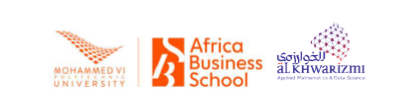

<h1 style='text-align: center;'>Lab 5 : Ensemble Learning (Boosting)</h1>

<h3 style='text-align: center;'> Master of Science in Quantitative and Financial Modelling </h3>


#### Professor : Fahd Kelloubi


#### Authors : Oumaima Chqaf
****

### Problem statment :

The Pima Indians dataset is a known example in the field of machine learning, commonly used for classification tasks that predict whether a woman will develop diabetes based on medical measurements. This is a significant component of medical diagnostic decision-support systems that can reduce false negatives and enhance treatment options.

The complexity of patient data makes it difficult for a single model to perform well, thus ensemble learning is an effective strategy for improving classification accuracy. Ensemble learning involves combining the predictions of multiple models, reducing overfitting, increasing diversity, and improving generalization performance. Despite the challenges posed by patient data, using ensemble learning can help create accurate models that can classify whether a woman is likely to develop diabetes or not.

### I. Loading the dataset:

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib
from matplotlib import pyplot
import numpy
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Load the Pima Indians dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
feature_names = names[:8]
data = pd.read_csv(url, names=names)
#Splitting the data into dependent and independent variables
X = data.drop("class", axis=1)
y= data["class"]
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7)

### II. Training and evaluating the boosting ensembles:

Within this section, we aim to train and assess multiple variations of boosting ensembles utilizing diverse boosting methods such as AdaBoost, Gradient Boosting, and XGBoost. The number of trees used in each method will differ, ranging from 50 to 200.

#### 1) AdaBoost:

AdaBoost (Adaptive Boosting) is a boosting algorithm that is frequently used in machine learning for classification tasks.
The algorithm works by combining various weak learnes to create a strong learner that can achieve higher accuracy.

In AdaBoost algorithm, each weak learner is trained on a weighted version of the training data set. After each iteration, the weights are modified to give higher importance to the training samples that were previously misclassified. This way, the algorithm focuses more on the samples that are difficult to classify, and less on the ones that are easy to classify.

The final prediction is the sign of the weighted sum. If the sum is positive, the predicted class is one, and if the sum is negative, the predicted class is zero. In this way, AdaBoost combines the predictions of multiple weak learners to obtain a more accurate and robust prediction.



In [4]:
#Let’s start by implementing the AdaBoost ensemble using the default parameters
model_ada = AdaBoostClassifier()
model_ada.fit(X_train,y_train)
model_ada.score(X_test, y_test)

0.70995670995671

After training the ensemble on the training subset and testing it on the testing subset, we can calculate the accuracy of the Adaboost ensemble and we obtain: 73.59%.

It’s possible to improve the accuracy score by using more trees, by default the number of trees is 50, so we train another Adaboost ensemble built with 100 trees by setting the parameter n_estimators to 100 and we calculate the score again:

In [5]:
model_ada = AdaBoostClassifier(n_estimators= 100)
model_ada.fit(X_train,y_train)
model_ada.score(X_test, y_test)

0.7142857142857143

We obtain an accuracy score of: 74,02%. The Adaboost ensemble of 100 trees performs better than the one with 50 trees.

To evaluate the effect of adding more decision trees to the boosting
ensembles, we can perform a grid search with a series of values of trees.

In [6]:
param_grid = dict(n_estimators= range(50,200,10))
grid_search_ada = GridSearchCV(model_ada, param_grid, scoring="accuracy", n_jobs=-1, cv=10,
verbose=1)
grid_search_ada.fit(X, y)
means_ada = grid_search_ada.cv_results_['mean_test_score']

Fitting 10 folds for each of 15 candidates, totalling 150 fits


We define a function since we are going to plot the results for the other methods too.

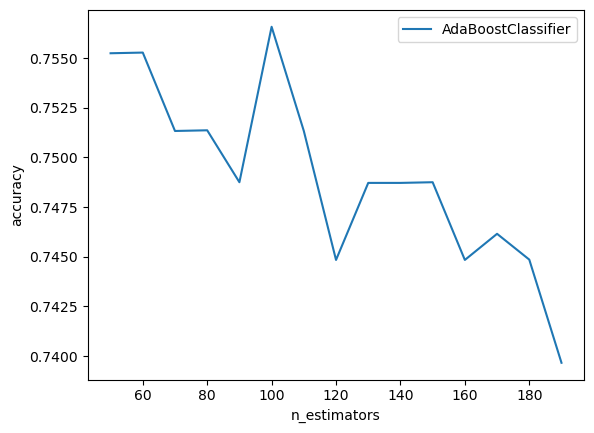

In [7]:
n_estimators=range(50,200,10)
def plot_results(model,means):
    scores = numpy.array(means).reshape(len(n_estimators))
    pyplot.plot(n_estimators, scores, label=str(model)[:-2].split("(")[0] )
    pyplot.legend()
    pyplot.xlabel('n_estimators')
    pyplot.ylabel('accuracy')
plot_results(model_ada, means_ada)

As depicted by the graph presented below, the maximum accuracy is attained at an estimator count of 100, surpassing a threshold of 75.55%. However, beyond this point, the accuracy of the model begins to decline.

#### 2) Gradient Boosting:

Gradient Boosting is a machine learning algorithm used for both regression and classification problems. The algorithm constructs a model in a stage-wise manner by iteratively adding weak learners to the ensemble.
Unlike other boosting algorithms, the weak learners in Gradient Boosting are fitted to the residual errors of the previous trees, rather than the original output values.

The algorithm works by first fitting a simple model to the data, typically a decision tree with a small number of leaf nodes. The model's predictions are then compared to the true target values, and the residual errors are computed as the differences between the predictions and the true values. The next model is then fitted to these residual errors, with the goal of reducing them further. This process is repeated for a specified number of iterations, with each subsequent model attempting to reduce the remaining errors.

To prevent overfitting, Gradient Boosting uses regularization techniques such as shrinkage, which reduces the contribution of each new model to the ensemble, and subsampling, which randomly selects a subset of the data for each tree to avoid redundancy.

Finally, the ensemble of weak learners is combined to form a single model that makes predictions by summing the contributions of each individual tree. The resulting model is often powerful, capable of achieving high accuracy on a wide range of regression and classification problems.

We implement the Gradient Boosting ensemble using the default parameters:

In [8]:
model_gbm = GradientBoostingClassifier()
model_gbm.fit(X_train,y_train)
model_gbm.score(X_test, y_test)

0.7445887445887446

After training the ensemble on the training subset and testing it on the testing subset, we can calculate the accuracy of the Gradient Boosting ensemble and we obtain: 72.27%.

As we did before, we perform a grid search for Gradient Boosting, to evaluate the ensembles with
different number of trees, and we plot the results.

Fitting 10 folds for each of 15 candidates, totalling 150 fits


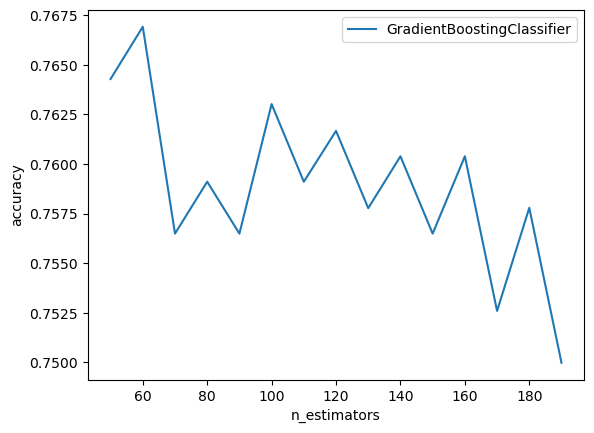

In [9]:
grid_search_gbm = GridSearchCV(model_gbm, param_grid, scoring="accuracy", n_jobs=-1, cv=10,
verbose=1)
grid_search_gbm.fit(X, y)
means_gbm = grid_search_gbm.cv_results_['mean_test_score']
plot_results(model_gbm,means_gbm )

By using only 60 estimators, Gradient Boosting achieves a higher accuracy of 76.60%. However, the accuracy of Gradient Boosting decreases beyond 60 estimators. This indicates that Gradient Boosting outperforms AdaBoost, because Gradient Boosting aims to minimize errors.

#### 3) XGBoost:

XGBoost stands for "Extreme Gradient Boosting". It is an advanced implementation of the gradient boosting algorithm that is designed to improve accuracy and computational efficiency.

XGBoost is a type of supervised learning algorithm that can be used for both classification and regression problems. The algorithm works by combining multiple weak learners (typically decision trees) into a single, more accurate model. During the training process, XGBoost adjusts the weights of each learner based on the errors made by the previous learners, with the goal of minimizing the overall error of the model.

XGBoost includes several key features that make it a powerful machine learning tool. For example, it uses a regularized model that helps to prevent overfitting, and it can handle missing values in the dataset. Additionally, XGBoost supports parallel processing, making it possible to train large models quickly.

Overall, XGBoost is a highly versatile and effective machine learning algorithm that can be applied to a wide range of problems. Its ability to produce highly accurate models with minimal computational resources has made it a popular choice in data science and machine learning applications.

In [10]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)
y_pred = model_xgb.predict(X_test)
model_xgb.score(X_test, y_test)
print(X_train)

     preg  plas  pres  skin  test  mass   pedi  age
338     9   152    78    34   171  34.2  0.893   33
694     2    90    60     0     0  23.5  0.191   25
741     3   102    44    20    94  30.8  0.400   26
541     3   128    72    25   190  32.4  0.549   27
180     6    87    80     0     0  23.2  0.084   32
..    ...   ...   ...   ...   ...   ...    ...  ...
200     0   113    80    16     0  31.0  0.874   21
16      0   118    84    47   230  45.8  0.551   31
326     1   122    64    32   156  35.1  0.692   30
479     4   132    86    31     0  28.0  0.419   63
378     4   156    75     0     0  48.3  0.238   32

[537 rows x 8 columns]


After training the ensemble on the training subset and testing it on the testing subset, we can calculate the accuracy of the XGBoost ensemble and we obtain: 73.59%.

Fitting 10 folds for each of 15 candidates, totalling 150 fits


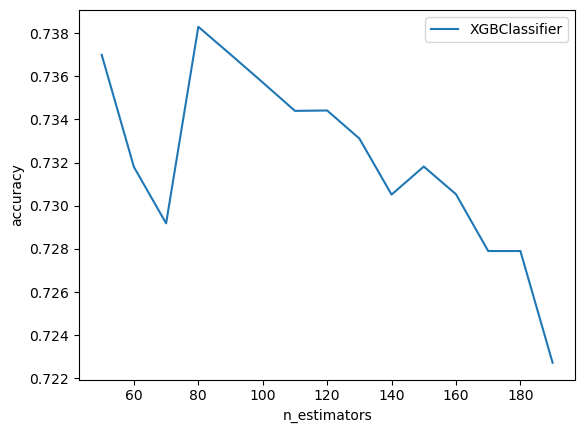

In [11]:
grid_search_xgb = GridSearchCV(model_xgb, param_grid, scoring="accuracy", n_jobs=-1, cv=10,
verbose=1)
grid_search_xgb.fit(X, y)
means_xgb = grid_search_xgb.cv_results_['mean_test_score']
plot_results(model_xgb,means_xgb)

### III. Comparing the different boosting methods:

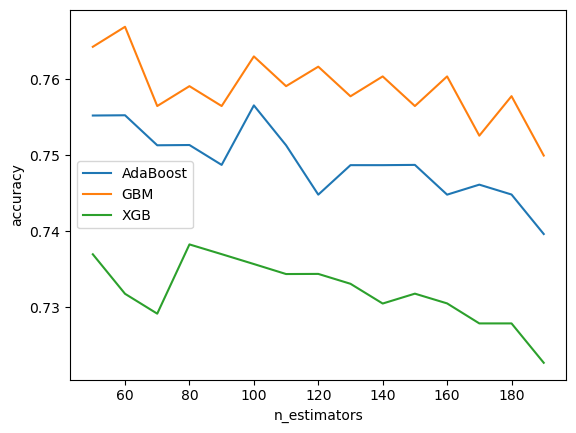

In [12]:
models = ['AdaBoost','GBM','XGB']
means=numpy.concatenate((means_ada,means_gbm, means_xgb), axis=None)
scores = numpy.array(means).reshape(len(models), len(n_estimators))
for i, value in enumerate(models):
    pyplot.plot(n_estimators, scores[i], label=str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('accuracy')
pyplot.savefig('boosting_accuracy.png')

In [13]:
import warnings
warnings.filterwarnings('ignore')

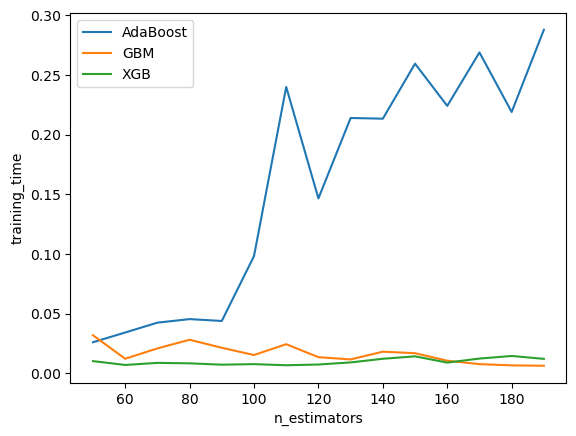

In [14]:
import numpy
models = ['AdaBoost','GBM','XGB']
means=numpy.concatenate((grid_search_ada.cv_results_['mean_score_time'],grid_search_gbm.cv_results_['mean_score_time'],grid_search_xgb.cv_results_['mean_score_time']), axis=None)
scores = numpy.array(means).reshape(len(models), len(n_estimators))
for i, value in enumerate(models):
    pyplot.plot(n_estimators, scores[i], label=str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('training_time')
pyplot.savefig('boosting_time.png')

XGBoost is faster and more accurate than Gradient Boosting and AdaBoost ensembles because it is highly optimized for performance, includes advanced regularization techniques, handles missing data more effectively, and includes other advanced features such as early stopping.

In [15]:


import pickle
# Save the trained model to a file
with open('xgb.pkl', 'wb') as file:
    pickle.dump(model_xgb,file)